In [9]:
# 필수 라이브러리 로딩
import pandas as pd
import numpy as np

from IPython.display import display, Image
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 해상도 더 높음




- (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기
- (2) "모델"을 세운다는 것, 그에 대한 의미 이해하기
- (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기
- (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!
- (5) 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!

In [5]:
import google.drive
drive.mount('drive/MyDrive')

ModuleNotFoundError: ignored

In [4]:
!mkdir -p ~/aiffel/bike_regression/data

In [3]:
!ln -s ~/data/data/* ~ /aiffel/bike_regression/data

ln: target '/aiffel/bike_regression/data' is not a directory


In [8]:
# 파일 불러오기
macbook = pd.read_csv('/content/drive/MyDrive/MLDL/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


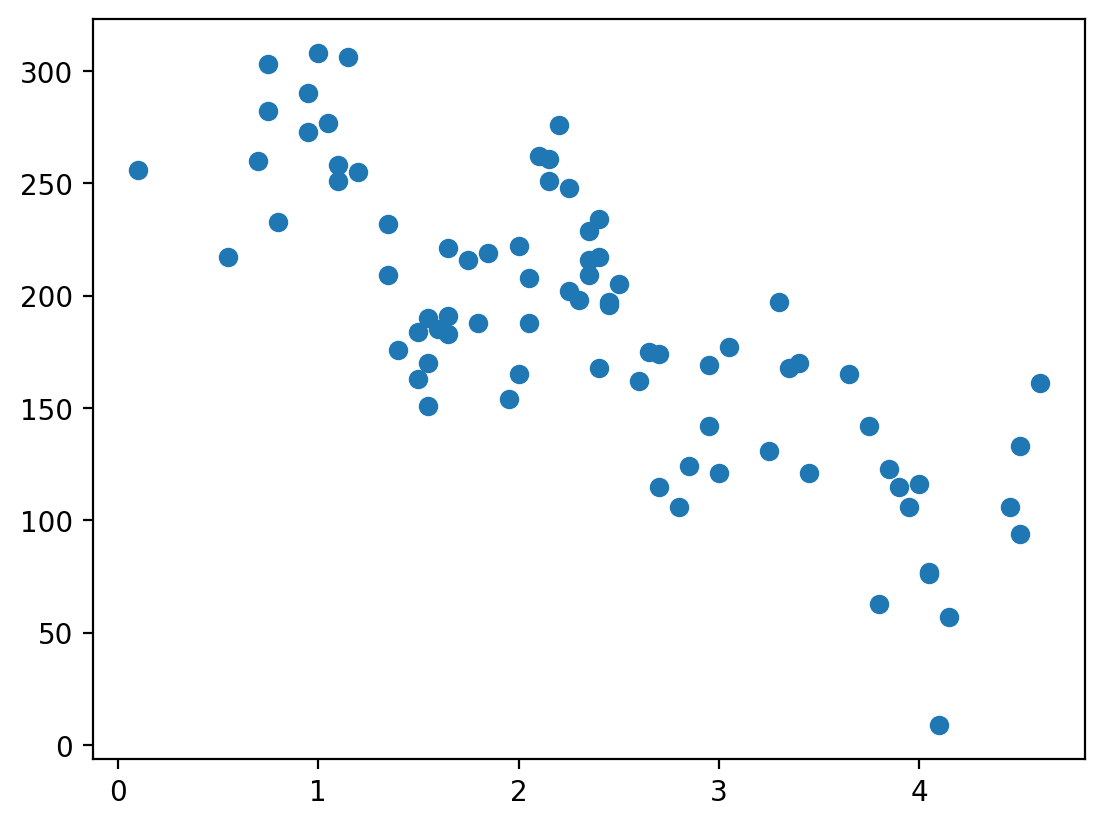

In [12]:
# 2차원 그래프
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [13]:
#  상관계수
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

In [14]:
x = macbook['used_years'].values
y = macbook['price'].values

In [15]:
# 일차 함수 모델
def model(x, w, b):
  y = w * x + b
  return y

In [16]:
model(5,2,1)

11

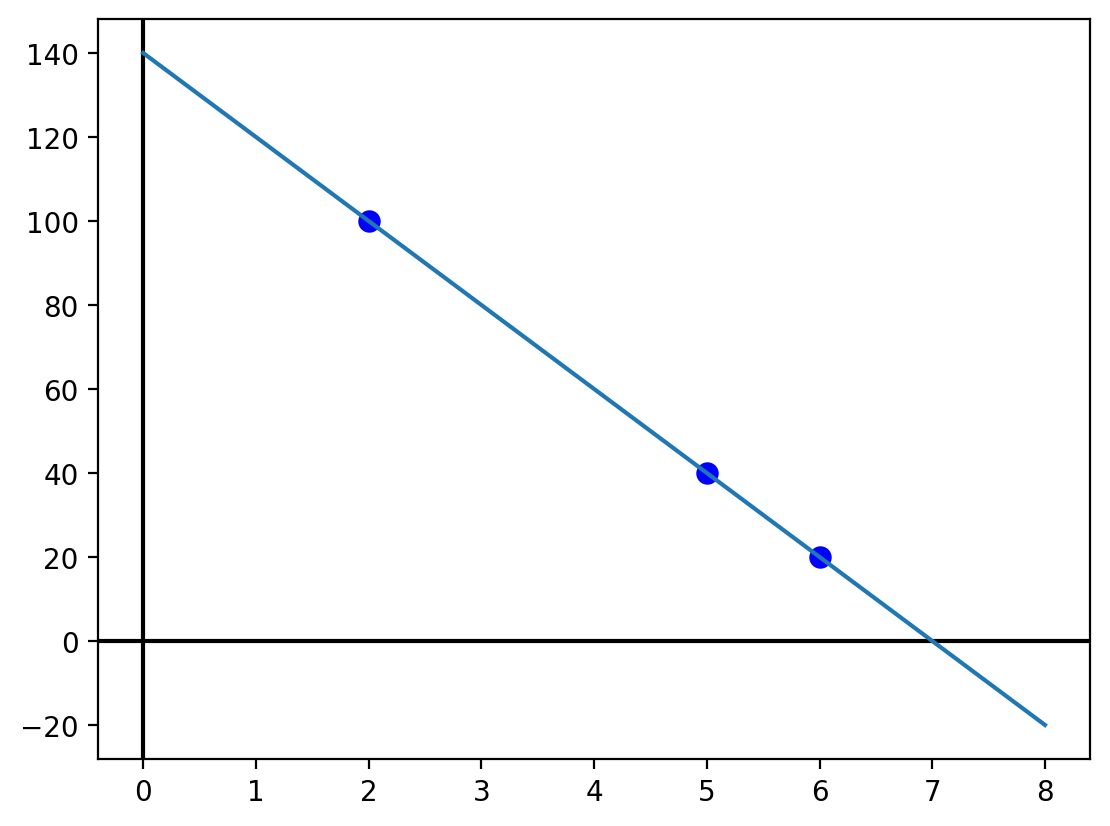

In [19]:
# x, y 축 그리기
plt.axvline(x=0, c= 'black')
plt.axhline(y=0, c= 'black')

# 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, -20, 140)
plt.plot(y)

# dot 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='b', s = 50)

plt.show()

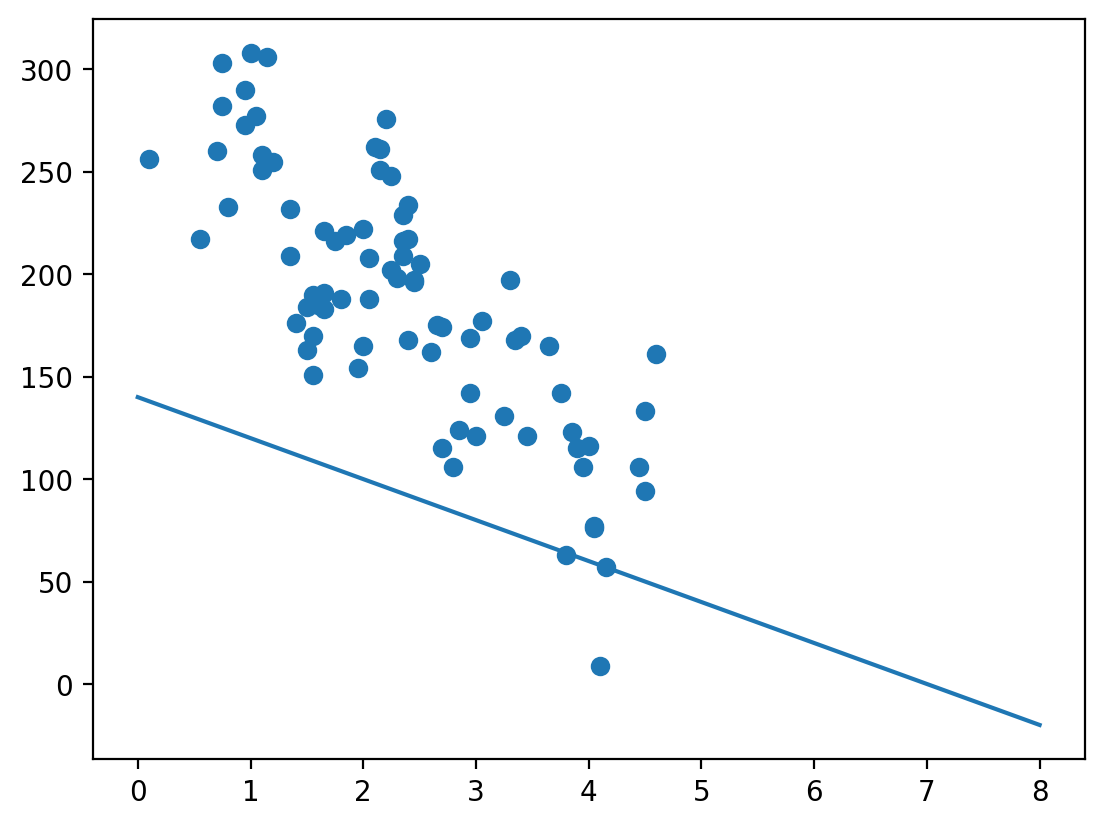

In [22]:
# 실제 데이터 값
x = np.linspace(0, 8, 9)
y = model(x, -20, 140)
plt.plot(y)

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

# 최적의 방정식 구하기

In [31]:
# model함수의 예측값 
x = macbook['used_years'].values
w = 3.1
b = 2.3

predict = model(x, 3.1, 2.3)

In [24]:
macbook['predict'] = predict
macbook.head()

,used_years,price,predict
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


In [26]:
# 예측과 실제값 차이 
macbook['error'] = macbook['price'] - macbook['predict']
macbook.head()

,used_years,price,predict,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


https://velog.io/@hyesoup/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8%EC%9D%98-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-MAE-MSE-RMSE-R-squred 
- 성능평가 지표

In [27]:
# RMSE 함수
def rmse(a, b):
  mse = ((a - b)** 2).mean() # 차의 제곱 평균
  rmse = mse ** 0.5 # 제곱근
  return rmse

In [32]:
x = macbook['used_years'].values
y = macbook['price'].values

prediction = model(x, w, b)
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [34]:
rmse(prediction, y)   # 정확도가 너무 떨어짐

188.81322969819274

# 손실함수(비용함수)
-  "모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수"

In [35]:
def loss(x, w, b, y):
  predictions = model(x, w, b)
  L = rmse(predictions, y)
  return L

# 기울기와 경사하강법
- 기울기를 사용해서 점차적으로 매개변수를 업데이트 하는 방식

In [36]:
def loss(x, w, b, y):
  predictions = model(x, w, b)
  L = rmse(predictions, y)
  return L

w ′  = w−ηg
- w ′  : 새로운 w
- w : 현재 w
- η : 얼마나 업데이트를 할 지를 결정하는 상수 (학습률)

- g : 기울기, 또는 그래디언트

In [37]:
# 미분을 통한 경사하강
## 여기서 loss 는 오차의 제곱평균 제곱근임

def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

입력 데이터 x와 정답 데이터 y 준비초기 w, b를 랜덤하게 선택현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산계산된 gradient를 활용해서w′=w−ηg ,b′=b−ηg 로 업데이트3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복

In [39]:
# 하이퍼 파라미터
## 학습률 
learningLate = 1

# 초기 가중치 설정 및 변수 재선언
w, b = 3.1, 2.3
x = macbook['used_years'].values
y = macbook['price'].values

# 손실함수 값 저장 
losses = []

In [40]:
# 직접 여러차례 학습하기 
for i in range(1, 2001):
  dw, db = gradient(x, w, b, y)  #  모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
  w -= learningLate * dw  # w = w - η * dw 로 업데이트
  b -= learningLate * db  # b = b - η * db 로 업데이트 
  L = loss(x, w, b, y)
  losses.append(L)
  if i % 100 == 0 :
    print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


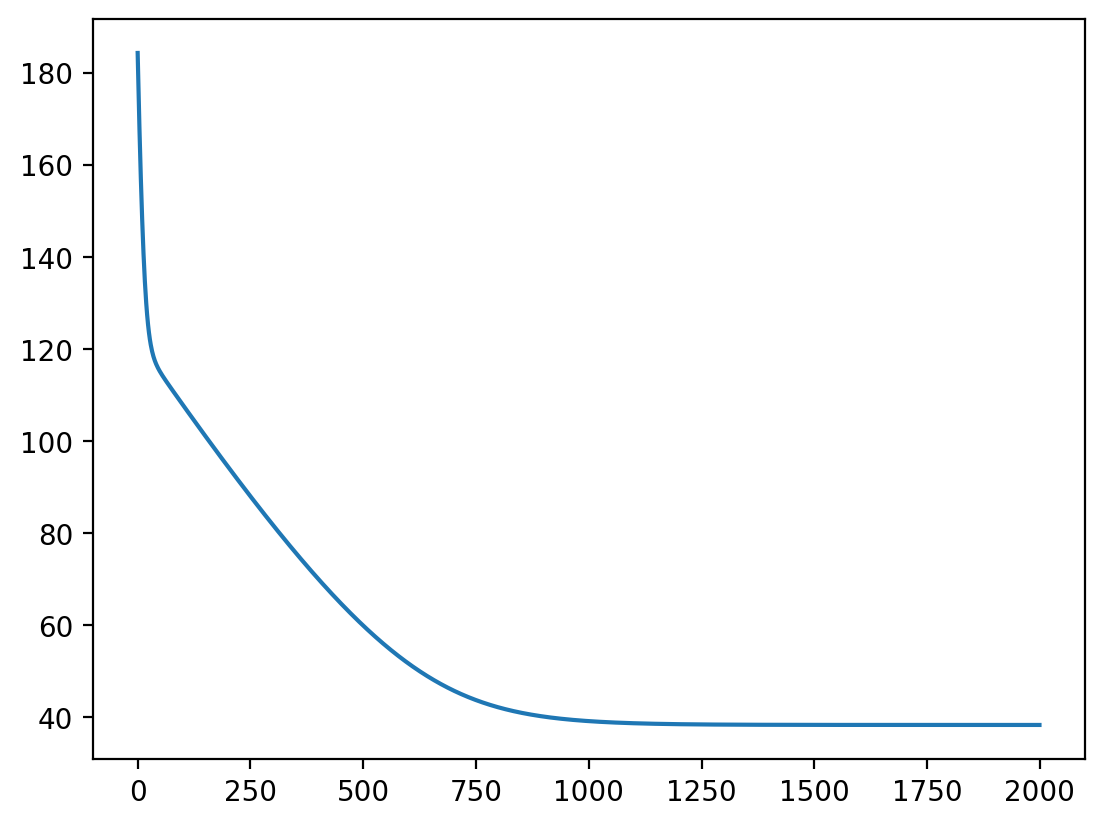

In [41]:
# loss값 확인
plt.plot(losses)
plt.show()

In [42]:
# 2000번의 학습 후 최고 하이퍼파라미터
w, b

(-44.92756090768412, 293.0815786721102)

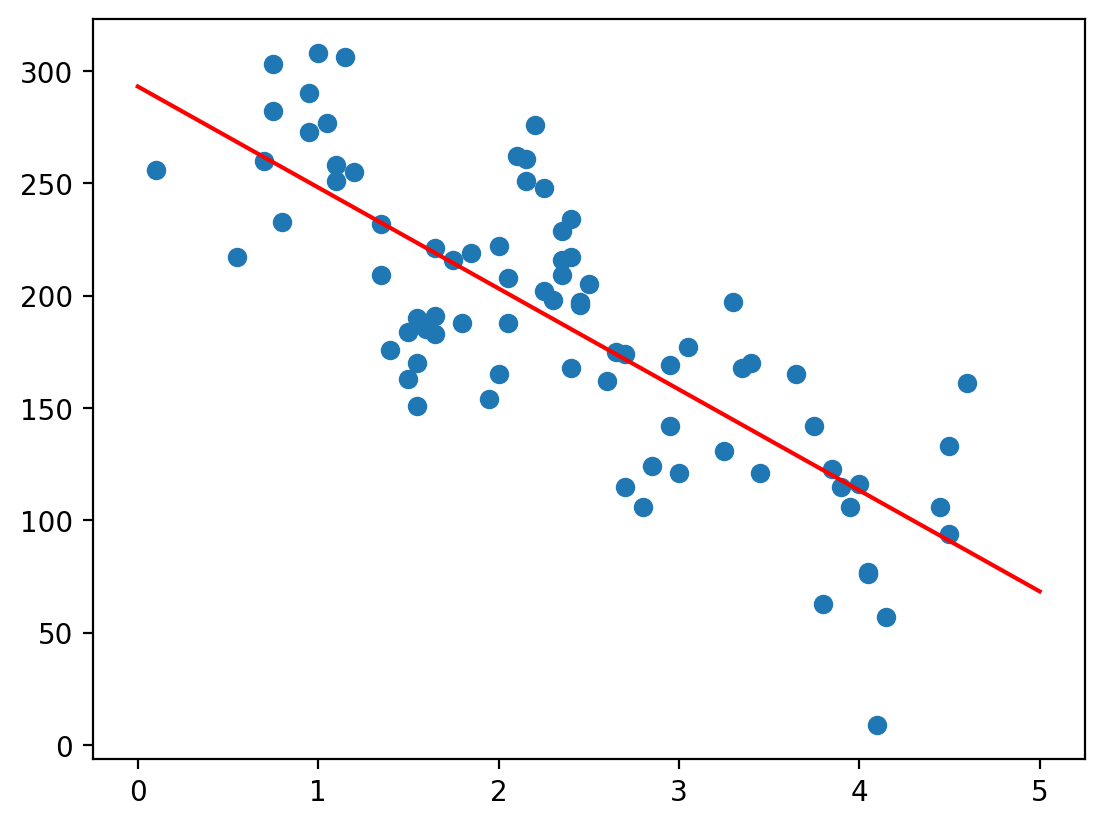

In [43]:
# raw data를 학습된 모델에 적용
x = np.linspace(0, 5, 6)

y = model(x, w, b)
plt.plot(y, c = 'r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

# 새로운 데이터의 적용값

In [44]:
test = pd.read_csv('/content/drive/MyDrive/MLDL/data/macbook_test.csv')
test.shape, test.head()

((20, 2),
    used_years  price
 0        1.20    203
 1        1.85    206
 2        2.40    191
 3        2.85    164
 4        3.05    176)

In [45]:
test_x, test_y = test['used_years'].values, test['price'].values
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [46]:
# erreor calculate
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.168506,-36.168506
1,1.85,206,209.965591,-3.965591
2,2.40,191,185.255432,5.744568
3,2.85,164,165.038030,-1.038030
4,3.05,176,156.052518,19.947482
5,3.35,136,142.574250,-6.574250
6,2.55,133,178.516298,-45.516298
7,2.60,181,176.269920,4.730080
8,2.50,181,180.762676,0.237324
9,3.10,86,153.806140,-67.806140


In [49]:
rms = ((test['error'] ** 2).sum() / len(test))** 0.5
rms

45.03918284717212

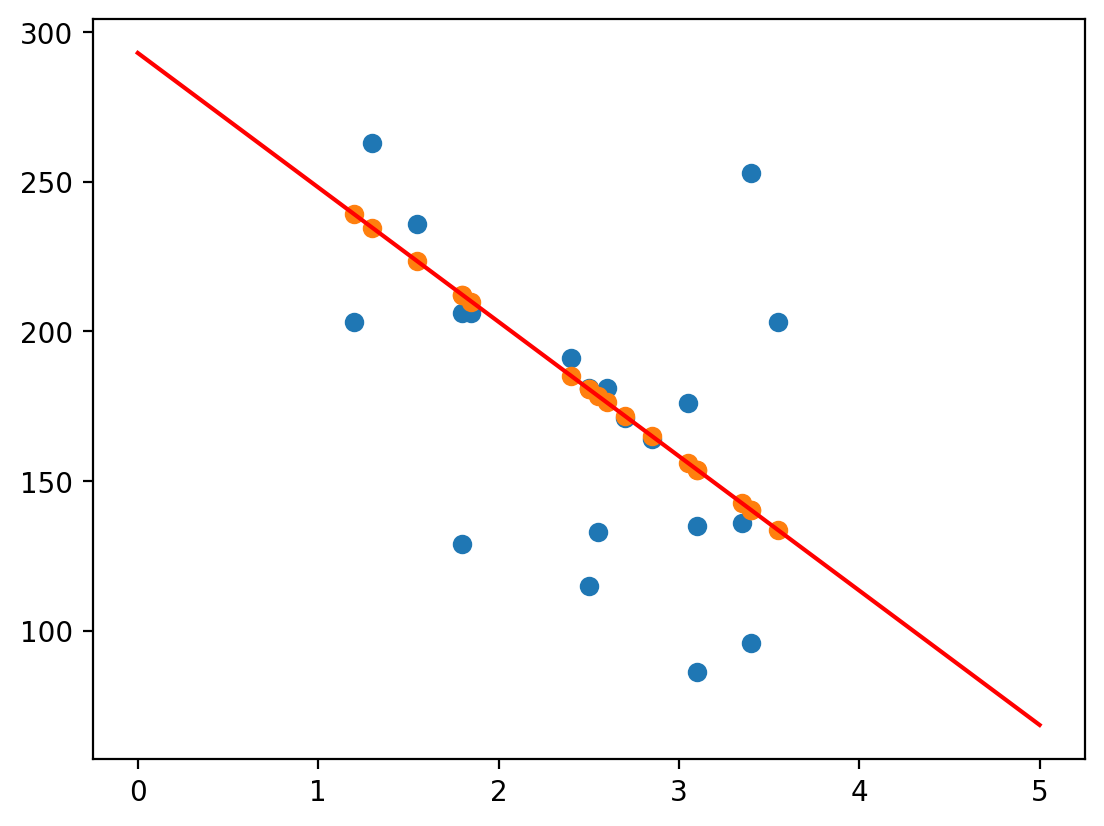

In [50]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()